In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Dsbda folder\PlayTennis.csv")

In [20]:
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [22]:
df_encoded = df.apply(le.fit_transform)

In [23]:
x=df_encoded.drop(['Play Tennis'],axis=1)
x

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [24]:
y=df_encoded['Play Tennis']
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play Tennis, dtype: int32

In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [27]:
gaussian = GaussianNB()
model= gaussian.fit(x_train,y_train)

In [28]:
x_train

,Outlook,Temperature,Humidity,Wind
13,1,2,0,0
9,1,2,1,1
1,2,1,0,0
7,2,2,0,1
10,2,2,1,0
3,1,2,0,1
0,2,1,0,1
5,1,0,1,0
12,0,1,1,1


In [29]:
y_pred = gaussian.predict(x_test)

In [31]:
accuracy_nb = round(accuracy_score(y_test,y_pred) * 100,2)

In [32]:
accuracy_nb

40.0

In [33]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average = 'micro')

print("Accuracy:-",accuracy)
print("Precision:-",precision)
print("Recall:-",recall)

Accuracy:- 0.4
Precision:- 0.4
Recall:- 0.4


In [37]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[0, 0],
       [3, 2]], dtype=int64)

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
cmD = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = ["Yes","No"])


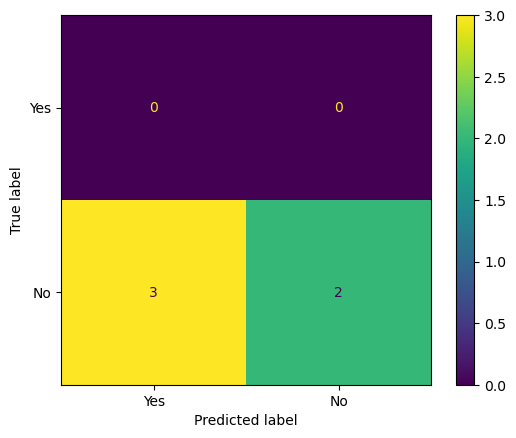

In [40]:
cmD.plot()